# [**Classification par le Centroïde le Plus Proche**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_6_neighbors/plot_nearest_centroid.ipynb)<br/>([_Nearest Centroid Classification_](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html))

Exemple d'utilisation de la classification par le Centroïde le Plus Proche. Il affichera les frontières de décision pour chaque classe.

None 0.8133333333333334
0.2 0.82


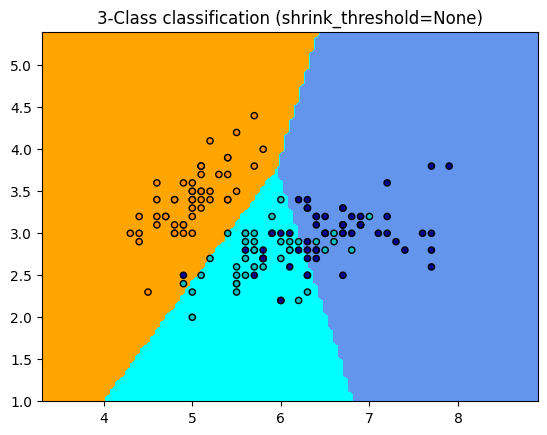

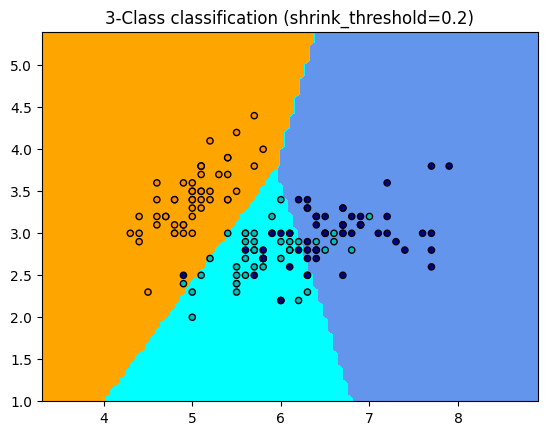

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title(f"3-Class classification (shrink_threshold={shrinkage})")
    plt.axis("tight")

plt.show()